# Sélection de variables

### Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.linear_model import ElasticNet, SGDClassifier

### Chargement de la donnée

In [2]:
data = pd.read_csv("D:/Programmation/Mes cours\SIMPLON/Différentes prez Formateur/Régression logistique/Data/client.csv", encoding="latin1")
data.columns

Index(['resilies', 'typeqipmt', 'typeqipmt.1', 'evolution_equip', 'agelettre',
       'anciennete', 'ageanc', 'pres_auto', 'demenagement', 'sinistre',
       'devis1', 'recla', 'desequip', 'revision', 'clisatis', 'occupation',
       'RIsatis', 'clichgtrib', 'UnivEPA', 'chgtUnivEPA', 'banque', 'banque1',
       'sinanc', 'Agerecodé', 'CliAnc', 'UnivAUT', 'UnivAUT.1', 'UnivHAB',
       'UnivPRE', 'combinaisonelig', 'ctc', 'devis2', 'devis3', 'devis4',
       'devis5', 'devis6', 'devis7', 'devis8', 'cyclvie', 'cliCSP'],
      dtype='object')

In [6]:
len(data.columns) # Nombre de variables

40

### Sélection de variables

In [7]:
data = data.fillna(99)
data = data.dropna()
X = data.drop('resilies', axis=1)
y = data['resilies']

In [8]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000930
Best score using built-in LassoCV: 0.059103


In [9]:
print("Lasso a retenu " + str(sum(coef != 0)) + " variables et éliminé " +  str(sum(coef == 0)) + " variables")

Lasso a retenu 24 variables et éliminé 15 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

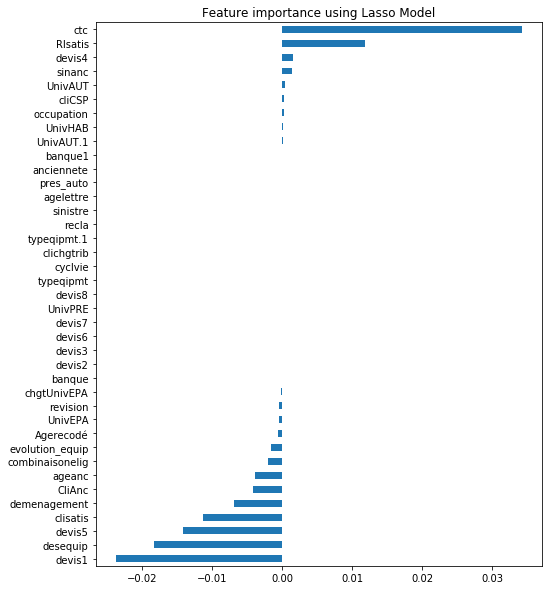

In [10]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

### Création de la nouvelle base de travail

In [11]:
# récupération des variables importantes
features = pd.DataFrame(imp_coef.where(imp_coef != 0).dropna()).transpose().columns

In [12]:
print(features)
y_ = pd.Index(['resilies'])
features = features.append([y_])
print(features)
data_ = data[features]
data_.head(5)

Index(['devis1', 'desequip', 'devis5', 'clisatis', 'demenagement', 'CliAnc',
       'ageanc', 'combinaisonelig', 'evolution_equip', 'Agerecodé', 'UnivEPA',
       'revision', 'chgtUnivEPA', 'banque', 'banque1', 'UnivAUT.1', 'UnivHAB',
       'occupation', 'cliCSP', 'UnivAUT', 'sinanc', 'devis4', 'RIsatis',
       'ctc'],
      dtype='object')
Index(['devis1', 'desequip', 'devis5', 'clisatis', 'demenagement', 'CliAnc',
       'ageanc', 'combinaisonelig', 'evolution_equip', 'Agerecodé', 'UnivEPA',
       'revision', 'chgtUnivEPA', 'banque', 'banque1', 'UnivAUT.1', 'UnivHAB',
       'occupation', 'cliCSP', 'UnivAUT', 'sinanc', 'devis4', 'RIsatis', 'ctc',
       'resilies'],
      dtype='object')


,devis1,desequip,devis5,clisatis,demenagement,CliAnc,ageanc,combinaisonelig,evolution_equip,Agerecodé,...,UnivAUT.1,UnivHAB,occupation,cliCSP,UnivAUT,sinanc,devis4,RIsatis,ctc,resilies
0,3,2,1,3,2,7,4,12,3,5,...,1,1,1,2.0,1,2,3,3,1,0
1,3,2,1,3,2,7,4,20,3,5,...,1,1,1,2.0,2,1,3,3,2,0
2,4,2,1,3,2,7,4,8,1,10,...,1,1,99,7.0,0,4,4,11,1,0
3,1,2,2,3,2,7,4,14,3,4,...,1,1,99,1.0,2,1,4,7,2,0
4,3,2,1,3,2,7,4,12,3,9,...,1,1,2,2.0,1,4,3,3,2,0


## Résumé pour ML

In [13]:
X = data.drop('resilies', axis=1)
y = data['resilies']
reg = LassoCV()
reg.fit(X, y)
coef = pd.Series(reg.coef_, index = X.columns)
features = pd.DataFrame(imp_coef.where(imp_coef != 0).dropna()).transpose().columns
y_ = pd.Index(['resilies'])
features = features.append([y_])
data_ = data[features]
data_.head(5)

,devis1,desequip,devis5,clisatis,demenagement,CliAnc,ageanc,combinaisonelig,evolution_equip,Agerecodé,...,UnivAUT.1,UnivHAB,occupation,cliCSP,UnivAUT,sinanc,devis4,RIsatis,ctc,resilies
0,3,2,1,3,2,7,4,12,3,5,...,1,1,1,2.0,1,2,3,3,1,0
1,3,2,1,3,2,7,4,20,3,5,...,1,1,1,2.0,2,1,3,3,2,0
2,4,2,1,3,2,7,4,8,1,10,...,1,1,99,7.0,0,4,4,11,1,0
3,1,2,2,3,2,7,4,14,3,4,...,1,1,99,1.0,2,1,4,7,2,0
4,3,2,1,3,2,7,4,12,3,9,...,1,1,2,2.0,1,4,3,3,2,0


In [14]:
len(data_.columns)

25